**Устанавливаем необходимые библиотеки**

In [15]:
import matplotlib.pyplot as plt # matplotlib для графиков
import seaborn as sns # seaborn для графиков
import numpy as np    # Нампай для массивов
import pandas as pd   # Пандас для данных
import re             # Регулярные выражения
import math           # Математический модуль
from matplotlib import rcParams # атрибут предоставляет доступ к настройкам и параметрам, управляющим внешним видом и поведением графиков
from tensorflow.keras import utils # Для приведения к категориальным данным
from google.colab import files     # Загрузка файлов
from IPython.display import clear_output # clear_output позволяет удалить текущий вывод из ячейки в блокноте
from datetime import datetime # Для работы с датами
# Команда для отображения графики в ячейках среды Google Colaboratory
%matplotlib inline

In [16]:
# Загрузка файла из облака в colab
import gdown
file_id = '1StibINHcBTQ2JtIlrL9ZBlMGv2Nrv9eo'
gdown.download (f"https://drive.google.com/uc?id={file_id}", None, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1StibINHcBTQ2JtIlrL9ZBlMGv2Nrv9eo
To: /content/Kombinacii.csv
100%|██████████| 109M/109M [00:02<00:00, 45.4MB/s]


'Kombinacii.csv'

In [17]:
# Загрузка данных из файла
data = pd.read_csv('Kombinacii.csv')
data_backup = data.copy()
data.head()

,id_ответа,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,...,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию,Ответ эксперта (Лактионов),"Поставьте галочку, если уверены на 100%",Если 75%,Если 50%,"Альтернатива, если 50% - обязательно",Комментарий
0,1,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,до 42 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб,True,False,False,0,0
1,2,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,от 43 до 60 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб,True,False,False,0,0
2,3,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,более 61 дня,нет мутаций,Не исследовался,Результативность лечения,Наблюдение,False,True,False,Дурвалумаб,Нет доказательной базы для назначения после пе...
3,4,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,до 42 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб,False,True,False,0,Возможно есть мутации и эффективность Дурвалум...
4,5,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,от 43 до 60 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб,False,True,False,0,Возможно есть мутации и эффективность Дурвалум...


In [18]:
# Параметр index_col определяет столбец, который будет использоваться как индекс
data = pd.read_csv('Kombinacii.csv', index_col=0)

# Выводим первых 7 строчек таблицы
data.head(7)

,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,Ко-мутации KEAP1,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию,Ответ эксперта (Лактионов),"Поставьте галочку, если уверены на 100%",Если 75%,Если 50%,"Альтернатива, если 50% - обязательно",Комментарий
id_ответа,,,,,,,,,,,,,,,,,,,,
1,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,до 42 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб,True,False,False,0,0
2,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,от 43 до 60 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб,True,False,False,0,0
3,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,более 61 дня,нет мутаций,Не исследовался,Результативность лечения,Наблюдение,False,True,False,Дурвалумаб,Нет доказательной базы для назначения после пе...
4,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,до 42 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб,False,True,False,0,Возможно есть мутации и эффективность Дурвалум...
5,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,от 43 до 60 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб,False,True,False,0,Возможно есть мутации и эффективность Дурвалум...
6,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,более 61 дня,не исследовались,Не исследовался,Результативность лечения,Наблюдение,False,True,False,Дурвалумаб,Нет доказательной базы для назначения после пе...
7,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,до 42 дней,EGFR редкий вариант,Не исследовался,Результативность лечения,Наблюдение,True,False,False,0,"Возможна низкая эффективность Дурвалумаба, Оси..."


In [19]:
data = data.iloc[:,0:15] # убираем два последних столбца, т.к. они не имеют значения для работы
data.head()

,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,Ко-мутации KEAP1,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию,Ответ эксперта (Лактионов)
id_ответа,,,,,,,,,,,,,,,
1,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,до 42 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб
2,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,от 43 до 60 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб
3,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,более 61 дня,нет мутаций,Не исследовался,Результативность лечения,Наблюдение
4,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,до 42 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб
5,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,от 43 до 60 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб


In [20]:
data.describe()

,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,Ко-мутации KEAP1,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию,Ответ эксперта (Лактионов)
count,248832,248832,248832,248832,248832,248832,248832,248832,248832,248832,248832,248832,248832,248832,248832
unique,3,2,2,3,2,2,2,2,2,2,3,6,3,2,4
top,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,до 42 дней,нет мутаций,Не исследовался,Результативность лечения,Наблюдение
freq,82944,124416,124416,82944,124416,124416,124416,124416,124416,124416,82944,41472,82944,124416,140544


In [21]:
data.nunique()

Раса                                                        3
Пол                                                         2
Возраст                                                     2
Статус курения                                              3
ECOG                                                        2
Есть опухолевая нагрузка? (симптомная опухоль)              2
Ко-мутации KRAS                                             2
Ко-мутации p53.                                             2
Ко-мутации STK11                                            2
Ко-мутации KEAP1                                            2
Срок от окончания ХЛТ                                       3
Молекулярный статус (только для неплоскоклеточного рака)    6
PD-L1 статус                                                3
Предпочтение пациента по ответу на терапию                  2
Ответ эксперта (Лактионов)                                  4
dtype: int64

In [23]:
# Перебираем все названия столбцов и для каждого выводим список уникальных значений
for name, values in data.items():
  print(name, ":", data[name].unique())

Раса : ['Азиатская' 'Европейская' 'Другая']
Пол : [' Мужской' ' Женский']
Возраст : [' До 70' ' >70']
Статус курения : [' В настоящее время'
 ' Курение в прошлом (бросил более 1 месяца до 1 года)'
 ' Курение в прошлом (бросил более 1 года)']
ECOG : [' 0-1' '2']
Есть опухолевая нагрузка? (симптомная опухоль) : [' да' ' нет']
Ко-мутации KRAS : [' да' ' нет']
Ко-мутации p53. : [' да' ' нет']
Ко-мутации STK11 : [' да' ' нет']
Ко-мутации KEAP1 : [' да' ' нет']
Срок от окончания ХЛТ : ['до 42 дней' 'от 43 до 60 дней' 'более 61 дня']
Молекулярный статус (только для неплоскоклеточного рака) : [' нет мутаций' ' не исследовались' ' EGFR редкий вариант' ' EGFR ex19'
 ' EGFR ex21' ' ALK позитивный']
PD-L1 статус : [' Не исследовался' ' Менее 1%' ' Более 1%']
Предпочтение пациента по ответу на терапию : [' Результативность лечения' ' сохранение качества жизни']
Ответ эксперта (Лактионов) : ['Дурвалумаб' 'Наблюдение' 'Осимертиниб' 'Алектиниб']


**Приведение датасета к векторному виду**

In [24]:
# Получаем названия столбцов датафрейма data и сохраняются в переменной data_colnames
data_colnames = data.columns.tolist()
# Определяем количество столбцов в датафрейме путем вычисления длины списка и сохраняем в переменной lst_count
lst_count = len(data_colnames)
# Циклом for перебираем индексы столбцов всей длины датафрейма data
for i in range(lst_count):
# Внутри цикла определяем текущее название столбца, на котором находится итерация, используя индекс i
  i_elem = data_colnames[i]
# print(f'названия колонок: {len(data_colnames)}: {data_colnames}')
  print(f"{i}->{lst_count}: '{i_elem}'")

0->15: 'Раса'
1->15: 'Пол'
2->15: 'Возраст'
3->15: 'Статус курения'
4->15: 'ECOG'
5->15: 'Есть опухолевая нагрузка? (симптомная опухоль)'
6->15: 'Ко-мутации KRAS'
7->15: 'Ко-мутации p53.'
8->15: 'Ко-мутации STK11'
9->15: 'Ко-мутации KEAP1'
10->15: 'Срок от окончания ХЛТ'
11->15: 'Молекулярный статус (только для неплоскоклеточного рака)'
12->15: 'PD-L1 статус'
13->15: 'Предпочтение пациента по ответу на терапию'
14->15: 'Ответ эксперта (Лактионов)'


In [25]:
# Создадим словарь, где каждому значению индекса столбца сопоставим массив уникальных значений ячейки, чтобы потом работать с индексами этого массива
# Функция словаря, который используется для хранения уникальных значений в каждом столбце нашего датафрейма
def getDictionary(data):
  dict={} # пустой словарь, который будет использован для хранения информации о столбцах

  for name in data_colnames: # цикл перебирает имена столбцов в data_colnames
   index = data_colnames.index(name) # получаем индекс текущего столбца в data_colnames, который будет использоваться как ключ в словаре
   uniq = data[name].unique() # Получаем уникальные значения в текущем столбце
   if uniq[0]!='0': # если первое уникальное значение в столбце не равно строке '0'
     a = np.insert(uniq, 0, '0') # создаём массив a, в который вставляется строка '0' в начало уникальных значений uniq, которые
     # будут использованы как значения, связанные с ключом index в словаре
     dict[index] =a # созданный массив a связывается с текущим индексом index в словаре dict.
   else: # если первое уникальное значение в столбце равно '0'
    dict [index] = data[name].unique() #  все уникальные значения из столбца name связываются с ключом index в словаре dict
  return dict # возвращаеv созданный словарь dict, который содержит уникальные значения для каждого столбца в data

dictionaryDefault = getDictionary(data) # функция getDictionary вызывается с data, и сохраняется в переменной dictionaryDefault
print(dictionaryDefault)

{0: array(['0', 'Азиатская', 'Европейская', 'Другая'], dtype=object), 1: array(['0', ' Мужской', ' Женский'], dtype=object), 2: array(['0', ' До 70', ' >70'], dtype=object), 3: array(['0', ' В настоящее время',
       ' Курение в прошлом (бросил более 1 месяца до 1 года)',
       ' Курение в прошлом (бросил более 1 года)'], dtype=object), 4: array(['0', ' 0-1', '2'], dtype=object), 5: array(['0', ' да', ' нет'], dtype=object), 6: array(['0', ' да', ' нет'], dtype=object), 7: array(['0', ' да', ' нет'], dtype=object), 8: array(['0', ' да', ' нет'], dtype=object), 9: array(['0', ' да', ' нет'], dtype=object), 10: array(['0', 'до 42 дней', 'от 43 до 60 дней', 'более 61 дня'],
      dtype=object), 11: array(['0', ' нет мутаций', ' не исследовались', ' EGFR редкий вариант',
       ' EGFR ex19', ' EGFR ex21', ' ALK позитивный'], dtype=object), 12: array(['0', ' Не исследовался', ' Менее 1%', ' Более 1%'], dtype=object), 13: array(['0', ' Результативность лечения', ' сохранение качества жизни

In [26]:
# преобразует данные таблицы в категориальный вид
def getArgmaxData(values):
  all_data = [] # Здесь будем хранить кодированные значения

  for val in values: # цикл перебирает строки val, представленные как список values
    ohe = [] # создаём пустой список ohe, который будет представлять закодированную строку для x_data. Числовые индексы для каждого значения в строке

    for i in range(len(val)): # цикл перебирает значения в текущей строке val
      currentList =  dictionaryDefault[i].tolist() # получаем список уникальных значений для столбца с индексом i
      currentIndex = currentList.index(val[i]) # находим индекс значения val[i] в списке currentList
# создаём массив с одной "1" и остальными "0" на позиции, соответствующей индексу currentIndex
      a = np.argmax(list(utils.to_categorical(currentIndex, len(currentList)).astype('int')))
      ohe.append(a) # полученный индекс a добавляется в список ohe
    all_data.append(ohe) # после обработки всех значений в строке, закодированный список ohe добавляется в список all_data.

  return all_data

In [28]:
all_data = getArgmaxData(data.values) # таблица полностью, значения в формате argmax
categorical = pd.DataFrame(all_data,columns=data_colnames)
categorical.head(10)

,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,Ко-мутации KEAP1,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию,Ответ эксперта (Лактионов)
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,3,1,1,1,2
3,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1
4,1,1,1,1,1,1,1,1,1,1,2,2,1,1,1
5,1,1,1,1,1,1,1,1,1,1,3,2,1,1,2
6,1,1,1,1,1,1,1,1,1,1,1,3,1,1,2
7,1,1,1,1,1,1,1,1,1,1,2,3,1,1,2
8,1,1,1,1,1,1,1,1,1,1,3,3,1,1,2
9,1,1,1,1,1,1,1,1,1,1,1,4,1,1,3


**Исследуем данные с помощью таблиц корелляции**

<Axes: >

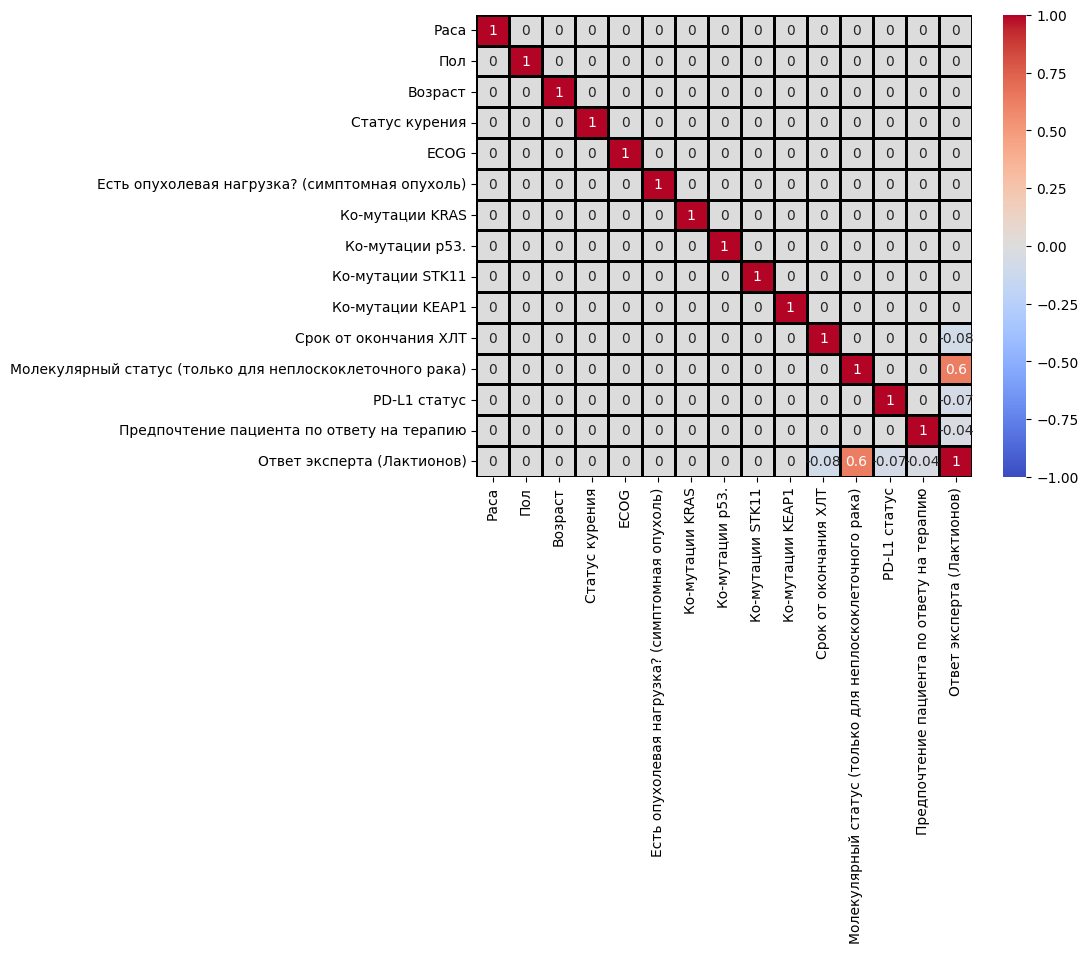

In [35]:
rcParams['figure.figsize'] = 8, 6 # увеличим размер графиков
# Метод, подсчитывающий попарную корреляцию для элементов.
corr_matrix = categorical.corr('spearman')
# Можно указать в параметрах способ подсчета.
sns.heatmap(corr_matrix, cmap= 'coolwarm', vmin=-1, center=0, linewidths=2,
            linecolor='black', annot = True, fmt='.1g')

<Axes: >

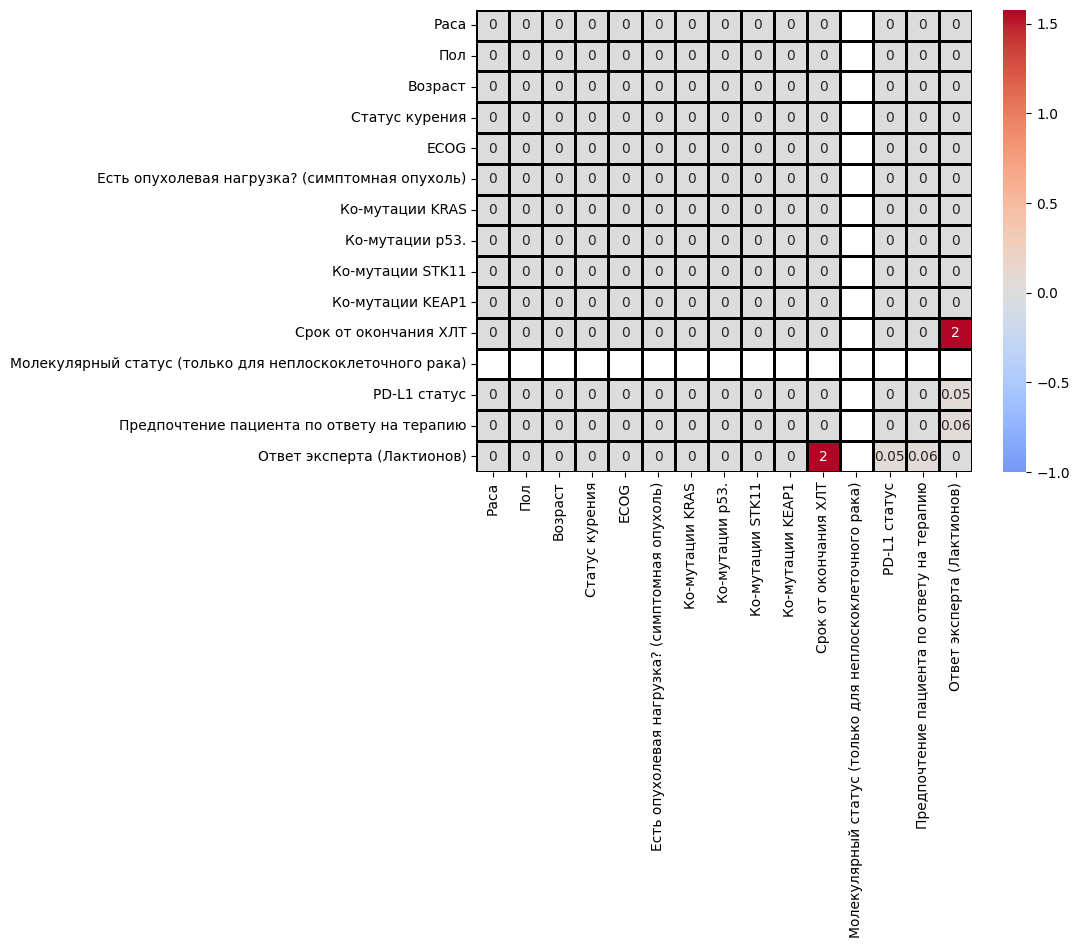

In [36]:
# Посмотрим на корреляцию для столбца Молекулярный статус (только для неплоскоклеточного рака)
corr_matrix = categorical[categorical['Молекулярный статус (только для неплоскоклеточного рака)'] == 1].corr('spearman')\
- categorical[categorical['Молекулярный статус (только для неплоскоклеточного рака)'] == 6].corr('spearman')
sns.heatmap(corr_matrix, cmap= 'coolwarm', vmin=-1, center=0, linewidths=2,
            linecolor='black', annot = True, fmt='.1g')

<Axes: >

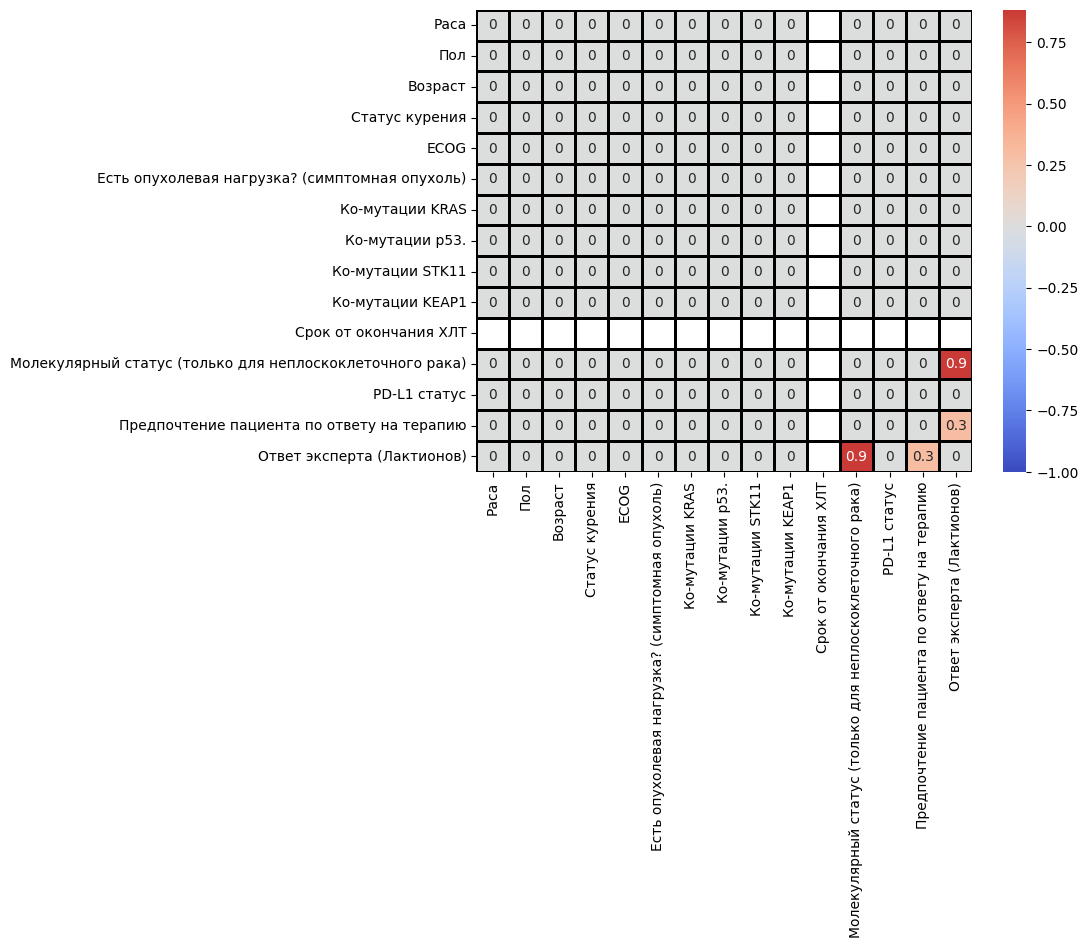

In [37]:
# Посмотрим на корреляцию для столбца Срок от окончания ХЛТ
corr_matrix = categorical[categorical['Срок от окончания ХЛТ'] == 1].corr('spearman')\
- categorical[categorical['Срок от окончания ХЛТ'] == 3].corr('spearman')
sns.heatmap(corr_matrix, cmap= 'coolwarm', vmin=-1, center=0, linewidths=2,
            linecolor='black', annot = True, fmt='.1g')

<Axes: >

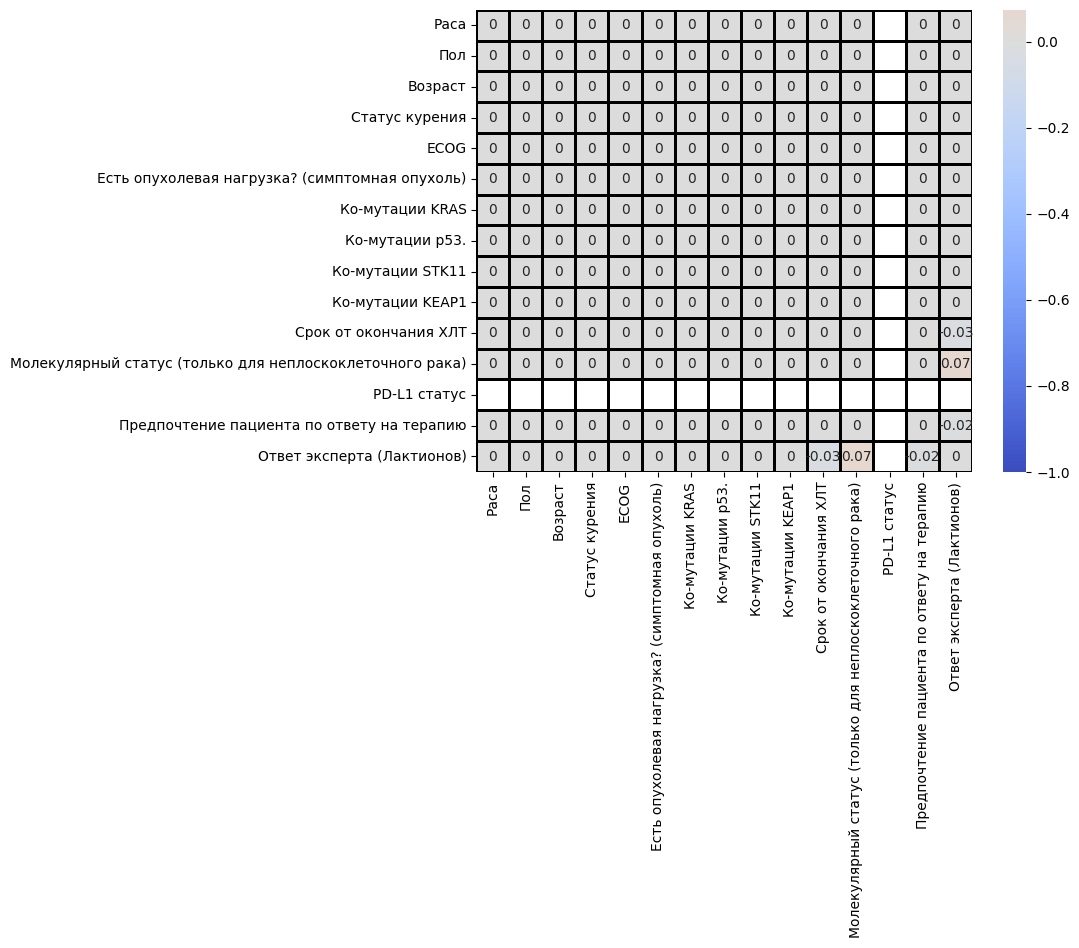

In [38]:
# Посмотрим на корреляцию для столбца PD-L1 статус
corr_matrix = categorical[categorical['PD-L1 статус'] == 1].corr('spearman')\
- categorical[categorical['PD-L1 статус'] == 3].corr('spearman')
sns.heatmap(corr_matrix, cmap= 'coolwarm', vmin=-1, center=0, linewidths=2,
            linecolor='black', annot = True, fmt='.1g')

**Выявление лишних признаков с помощью feature_selection, chi2**

**Feature Selection**

In [45]:
# импортируем класс SelectFromModel из модуля feature_selection в библиотеке sklearn
from sklearn.feature_selection import SelectFromModel
# импортируем класс LassoCV из модуля linear_model в библиотеке sklearn
from sklearn.linear_model import LassoCV

In [46]:
# создает объект регрессионной модели LassoCV,
# который будет использовать кросс-валидацию с 5 фолдами для обучения и выбора оптимальных коэффициентов регрессии Lasso
clf = LassoCV(cv=5)

In [47]:
# Создадим данные, необходимые для обучения и проверки модели машинного обучения
X = categorical[['Раса','Пол', 'Возраст','Статус курения','ECOG', 'Есть опухолевая нагрузка? (симптомная опухоль)','Ко-мутации KRAS', 'Ко-мутации p53.', 'Ко-мутации STK11','Ко-мутации KEAP1',\
                 'Срок от окончания ХЛТ', 	'Молекулярный статус (только для неплоскоклеточного рака)', 	'PD-L1 статус', 	'Предпочтение пациента по ответу на терапию']]
y = categorical['Ответ эксперта (Лактионов)']

In [48]:
# sfm будет использовать модель LassoCV для выбора наилучших признаков из X
sfm = SelectFromModel(clf)
# sfm будет содержать только те признаки из X, которые были выбраны как наиболее важные для модели LassoCV.
sfm.fit(X,y)

SelectFromModel(estimator=LassoCV(cv=5))

In [49]:
SelectFromModel(estimator=LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=None,
                                 positive=False, precompute='auto', random_state=None,selection= 'cyclic', tol=0.0001, verbose=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

SelectFromModel(estimator=LassoCV(cv=5))

In [51]:
# выбираем наиболее важные признаки из набора X на основе оценки важности признаков, предоставленной LassoCV.
n_features = sfm.transform(X).shape[1]
n_features

4

In [52]:
sfm.transform(X)

array([[1, 1, 1, 1],
       [2, 1, 1, 1],
       [3, 1, 1, 1],
       ...,
       [1, 6, 3, 2],
       [2, 6, 3, 2],
       [3, 6, 3, 2]])

In [53]:
sfm.get_support()

array([False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True])

**chi2**

In [54]:
from sklearn.feature_selection import SelectKBest, chi2

In [55]:
# Выбираем 3 признака с наивысшим "хи-квадрат".
chi2_features = SelectKBest(chi2, k = 3)
X_kbest_features = chi2_features.fit_transform(X, y)

# Вывод "до и после"
print("Количество признаков до преобразования:", X.shape[1])
print("Количество признаков после преобразования:", X_kbest_features.shape[1])
chi2_features.get_feature_names_out()

Количество признаков до преобразования: 14
Количество признаков после преобразования: 3


array(['Срок от окончания ХЛТ',
       'Молекулярный статус (только для неплоскоклеточного рака)',
       'Предпочтение пациента по ответу на терапию'], dtype=object)

**Вывод**


*Наиболее зависимые признаки: 'Молекулярный статус (только для неплоскоклеточного рака)', 'PD-L1 статус', 'Предпочтение пациента по ответу на терапию'. Особую важность имеет столбец 'Молекулярный статус (только для неплоскоклеточного рака)'.*

**Делим таблицу на x-data и y_data**

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x_data = categorical.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13]]
x_data.head(5)

,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,Ко-мутации KEAP1,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,2,1,1,1
2,1,1,1,1,1,1,1,1,1,1,3,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1,2,1,1
4,1,1,1,1,1,1,1,1,1,1,2,2,1,1


In [58]:
y_data = categorical.iloc[:, [14]]
y_data.head(5)

,Ответ эксперта (Лактионов)
0,1
1,1
2,2
3,1
4,1


In [59]:
y_data.nunique()

Ответ эксперта (Лактионов)    4
dtype: int64

**Обучение нейросети**

In [62]:
# Подключение нужных слоев из модуля tensorflow.keras.layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.layers import Dropout, BatchNormalization

In [63]:
# Задание константы количества распознаваемых классов
CLASS_COUNT = 10

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x_data, # ----------------- датасет с изображениям
                                                    y_data, # ----------------- датасет с метками
                                                    test_size = 0.1, # --- процент тестовых значений
                                                    shuffle=True, # ------ перемешивание
                                                    random_state=42) # ---

print('Обучающая выборка данных', len(x_train))
print('Обучающая выборка меток', len(y_train))
print()
print('Тестовая выборка данных', len(x_test))
print('Тестовая выборка меток', len(y_test))

Обучающая выборка данных 223948
Обучающая выборка меток 223948

Тестовая выборка данных 24884
Тестовая выборка меток 24884


In [65]:
print(x_train.shape)
print(y_train.shape)

(223948, 14)
(223948, 1)


In [66]:
# Преобразовываем ответы в формат one_hot_encoding
y_train = utils.to_categorical(y_train, CLASS_COUNT)
y_test = utils.to_categorical(y_test, CLASS_COUNT)

In [67]:
# Вывод формы y_train
print(y_train.shape)

(223948, 10)


In [68]:
model = Sequential()

model.add(Dense(140, input_dim=14, activation='relu', name='Class_2'))  # полносвязный слой
model.add(Dropout(0.3))
model.add(Dense(CLASS_COUNT, activation='softmax', name='Class_4'))  # выходной полносвязный слой,
model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Class_2 (Dense)             (None, 140)               2100      
                                                                 
 dropout (Dropout)           (None, 140)               0         
                                                                 
 Class_4 (Dense)             (None, 10)                1410      
                                                                 
Total params: 3510 (13.71 KB)
Trainable params: 3510 (13.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [69]:
store_learning = model.fit(x_train,
                  y_train,
                  batch_size=100,
                  epochs=10,
                  validation_split=0.2,  # 20% использовать для проверки,
                  shuffle=True,
                  verbose=1)

Epoch 1/10
1792/1792 [==============================] - 5s 3ms/step - loss: 0.5387 - accuracy: 0.7881 - val_loss: 0.3112 - val_accuracy: 0.8831
Epoch 2/10
1792/1792 [==============================] - 5s 3ms/step - loss: 0.2671 - accuracy: 0.8982 - val_loss: 0.1610 - val_accuracy: 0.9544
Epoch 3/10
1792/1792 [==============================] - 4s 2ms/step - loss: 0.1626 - accuracy: 0.9452 - val_loss: 0.0841 - val_accuracy: 0.9840
Epoch 4/10
1792/1792 [==============================] - 6s 3ms/step - loss: 0.1052 - accuracy: 0.9680 - val_loss: 0.0466 - val_accuracy: 0.9954
Epoch 5/10
1792/1792 [==============================] - 4s 2ms/step - loss: 0.0701 - accuracy: 0.9804 - val_loss: 0.0284 - val_accuracy: 0.9990
Epoch 6/10
1792/1792 [==============================] - 4s 2ms/step - loss: 0.0491 - accuracy: 0.9866 - val_loss: 0.0185 - val_accuracy: 0.9998
Epoch 7/10
1792/1792 [==============================] - 5s 3ms/step - loss: 0.0380 - accuracy: 0.9904 - val_loss: 0.0115 - val_accuracy:

In [70]:
print(store_learning.history)

{'loss': [0.5387247204780579, 0.26706284284591675, 0.16261032223701477, 0.10518565773963928, 0.07009819149971008, 0.04909001663327217, 0.03795429319143295, 0.029719321057200432, 0.023253709077835083, 0.01978376694023609], 'accuracy': [0.7880976796150208, 0.8981736898422241, 0.9452215433120728, 0.9680002927780151, 0.9804418683052063, 0.9866374731063843, 0.9904218912124634, 0.9928498864173889, 0.9950546622276306, 0.9953169822692871], 'val_loss': [0.31124183535575867, 0.1610063910484314, 0.08406070619821548, 0.046615827828645706, 0.028376717120409012, 0.01852858066558838, 0.011523379944264889, 0.01013642456382513, 0.006182863377034664, 0.005008223466575146], 'val_accuracy': [0.8831435441970825, 0.9543648362159729, 0.9839919805526733, 0.9954007863998413, 0.998995304107666, 0.9997990727424622, 0.9999330043792725, 1.0, 1.0, 1.0]}


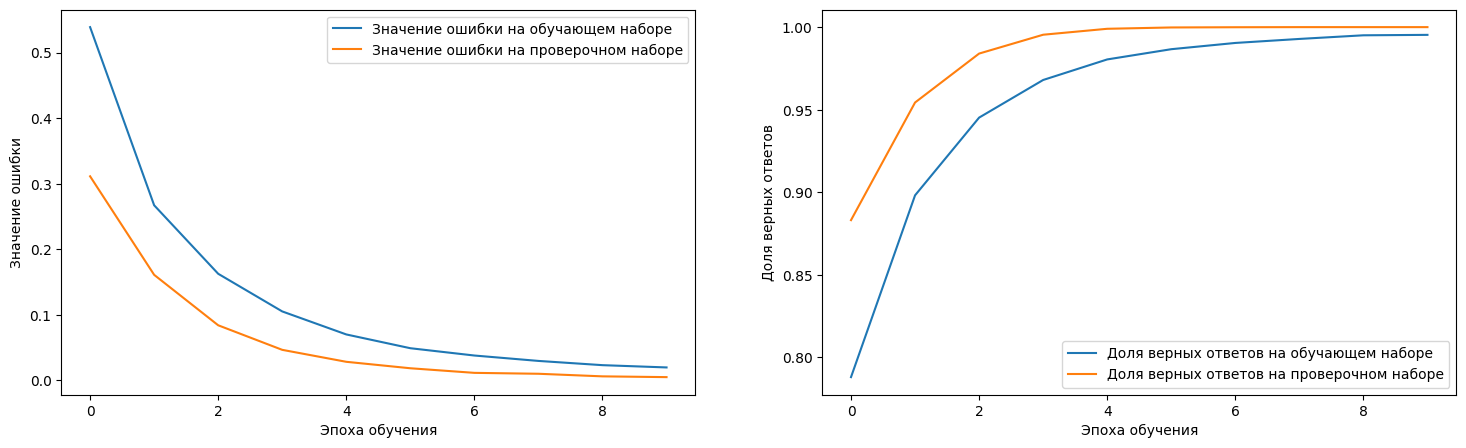

In [71]:
# Создание полотна для рисунка
plt.figure(1, figsize=(18, 5))

# Задание первой (левой) области для построения графиков
plt.subplot(1, 2, 1)
# Отрисовка графиков 'loss' и 'val_loss' из значений словаря store_learning.history
plt.plot(store_learning.history['loss'],
         label='Значение ошибки на обучающем наборе')
plt.plot(store_learning.history['val_loss'],
         label='Значение ошибки на проверочном наборе')
# Задание подписей осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение ошибки')
plt.legend()

# Задание второй (правой) области для построения графиков
plt.subplot(1, 2, 2)
# Отрисовка графиков 'accuracy' и 'val_accuracy' из значений словаря store_learning.history
plt.plot(store_learning.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(store_learning.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
# Задание подписей осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()

# Фиксация графиков и рисование всей картинки
plt.show()

In [72]:
scores = model.evaluate(x_test,
                        y_test,
                        verbose=1
                        )

778/778 [==============================] - 1s 2ms/step - loss: 0.0052 - accuracy: 1.0000


In [73]:
print(type(scores))
print(scores)

<class 'list'>
[0.005172362085431814, 1.0]


In [74]:
print('Процент верных ответов на тестовых данных:', round(scores[1],2) * 100, '%')

Процент верных ответов на тестовых данных: 100.0 %
